In [212]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.cluster import DBSCAN

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


# from sklearn.neighbors import KNeighborsRegressor




## Functions

In [245]:
def get_scores(model, X_train, X_test, y_train, y_test, **kwargs):
    model = model(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), \
           precision_score(y_test, y_predict), \
           recall_score(y_test, y_predict)

def tokenize(doc):
    '''
    INPUT: string
    OUTPUT: list of strings

    Tokenize and stem/lemmatize the document.
    '''
    return [port.stem(w) for w in word_tokenize(doc.lower())]

In [218]:
df = pd.read_csv('../cleaned_comments.csv')

In [232]:
sample_df1= df.sample(frac=1/15, random_state=1)
sample_df1.columns


array(["The fact is folks we need to generate revenue to close the budget gap. We have cut the budget and we can't go much lower without even more negative impacts on services.  Now its time to generate revenue and all Alaskans need to have some skin in the game and that means reduced dividend checks and an income or a sales tax. I am glad the legislators are willing to make some hard and unpopular choices for the benefit of our state as a whole.",
       "Just look at Colorado's leftist leadership and their accomplishments, from useless magazine capacity limits, preventing the execution of a mass murderer, protecting foreign criminals, making the police department politically correct, and many others, all of those moves encouraged more crime, so why is this a surprise?",
       'My heart aches for his family. He sounded like an amazing son, brother, friend. Positive thoughts and healing prayers. May his Memory be Eternal',
       ..., 'Ok I admit it. Trump has a secret weather machine

In [221]:
sample_df.drop(['Unnamed: 0','created'], axis = 1, inplace = True)
# sample_df = sample_df1[['parent_id', 'created_time']]

In [223]:
y = sample_df1.pop('rating')

In [224]:
text = sample_df1.pop('text')

In [225]:
X = sample_df.values

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [228]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [229]:
# yt_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# y_pred = model.predict(X_test)
# test_score = r2_score(y_test, y_pred)
# #overfit my model?
# train_score, test_score
len(model.feature_importances_)

2

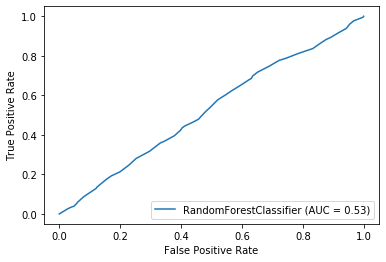

In [230]:

plot_roc_curve(model, X_test, y_test)


In [246]:
#Get varying acc prec recall
get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, max_features = 5)

(0.9765628830595734, 0.977665423129786, 0.9988465396188566)

Text(0.5, 1.0, 'Accuracy vs Num Features')

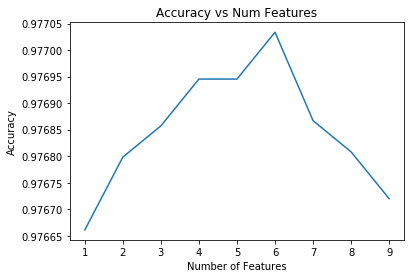

In [198]:
#find the right num features
num_features = range(1, 10)
accuracies = []

for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(X_train, y_train)
        tot += rf.score(X_test, y_test)
    accuracies.append(tot / 5)
fig, ax = plt.subplots()
ax.plot(num_features, accuracies)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title('Accuracy vs Num Features')



In [211]:
# or train_index, test_index in skf.split(X, y):
# ...     print("TRAIN:", train_index, "TEST:", test_index)
# ...     X_train, X_test = X[train_index], X[test_index]
# ...     y_train, y_test = y[train_index], y[test_index]

# cv = StratifiedKFold(n_splits=6)
# classifier = RandomForestClassifier(max_features = 6)
# for train, test in cv.split(X, y):
#     classifier.fit(X[train], y[train])

In [210]:
# cv = StratifiedKFold(n_splits=6)
# classifier = RandomForestClassifier(max_features = 6)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz = plot_roc_curve(classifier, X[test], y[test],
#                          name='ROC fold {}'.format(i),
#                          alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic")
# ax.legend(loc="lower right")
# plt.show()

## Other Models

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

lr = get_scores(LogisticRegression, X_train, X_test, y_train, y_test)
dt = get_scores(DecisionTreeClassifier, X_train, X_test, y_train, y_test)
nb = get_scores(MultinomialNB, X_train, X_test, y_train, y_test)

In [217]:
# lr
# nb
# dt

Store info for later
accuracy_score_rf = {'basic': [0.9999509659703835, 0.9775925471929394]}


## Add in the NLP

In [233]:
snowball = SnowballStemmer(language = 'english')
port = PorterStemmer()

# tokenized = [snowball.stem(w) for w in word_tokenize(X.lower())]

In [234]:
vectorizer = TfidfVectorizer(max_features=100, stop_words='english', tokenizer= tokenize)
vect = vectorizer.fit_transform(text.values).todense()

/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words

In [235]:
features = vectorizer.get_feature_names()
np.unique(features)

array(['!', '$', '%', "'", "''", "'m", "'re", "'s", '(', ')', ',', '-',
       '--', '.', '...', ':', ';', '?', '``', 'actual', 'american', 'ani',
       'anoth', 'becaus', 'befor', 'believ', 'better', 'ca', 'canada',
       'canadian', 'care', 'chang', 'come', 'comment', 'cost', 'countri',
       'day', 'did', 'doe', 'elect', 'everi', 'fact', 'good', 'govern',
       'ha', 'hi', 'issu', 'job', 'just', 'know', 'law', 'let', 'liber',
       'like', 'live', 'look', 'make', 'mani', 'mean', 'money', "n't",
       'nation', 'need', 'new', 'noth', 'onli', 'parti', 'pay', 'peopl',
       'person', 'point', 'polit', 'presid', 'problem', 'public', 'read',
       'realli', 'right', 'said', 'say', 'state', 'support', 'tax', 'thi',
       'thing', 'think', 'time', 'tri', 'trump', 'use', 'veri', 'vote',
       'wa', 'want', 'way', 'whi', 'work', 'world', 'year', '’'],
      dtype='<U8')

In [236]:
vect.shape

(81577, 100)

In [247]:
# new_X = np.concatenate((X, vect), axis = 1)
X_train, X_test, y_train, y_test = train_test_split(vect, y, stratify = y)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

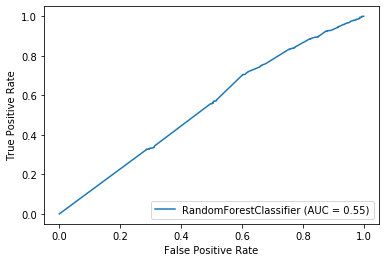

In [248]:
model.predict(X_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# y_pred = model.predict(X_test)
# test_score = r2_score(y_test, y_pred)
# #overfit my model?
# train_score, test_score
len(model.feature_importances_)
plot_roc_curve(model, X_test, y_test)


In [ ]:
# def get_scores(model, X_train, X_test, y_train, y_test, **kwargs):
#     model = model(**kwargs)
#     model.fit(X_train, y_train)
#     y_predict = model.predict(X_test)
#     return model.score(X_test, y_test), \
#            precision_score(y_test, y_predict), \
#            recall_score(y_test, y_predict)



In [249]:
get_scores(RandomForestClassifier, X_train, X_test, y_train, y_test, max_features = 5)

(0.9767590095611669, 0.977716697752037, 0.9989969909729187)

(For imbalanced data, the argument changes; accuracy here is practically useless, and you should consider precision, recall, and the confusion matrix instead).

## new_X includes all features including tokenized words

In [180]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, stratify = y)

## Cross Valedate Test

In [123]:
sk_train_neg_rmses = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')
sk_train_rmse = np.mean(sk_train_neg_rmses)*(-1)

In [125]:
sk_test_neg_rmses = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
sk_test_rmse = np.mean(sk_test_neg_rmses)*(-1)

In [126]:
print(f'Sklearn train RMSE: {sk_train_rmse:0.03f}')
print(f'Sklearn test RMSE: {sk_test_rmse:0.03f}')

Sklearn train RMSE: 0.149
Sklearn test RMSE: 0.150


In [ ]:
def plot_error_vs_splitsize(X_train, y_train, n_obs_arr):
    cv_train_errors = []
    cv_test_errors = []
    for n_obs in n_obs_arr.astype('int'):
        train_error = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error')

        test_error = cross_val_score(model, X_test, y_test, scoring='neg_root_mean_squared_error')
        cv_train_errors.append(np.mean(train_error)*-1)
        cv_test_errors.append(np.mean(test_error)*-1)
    
    plt.close('all')
    
    fig, ax = plt.subplots()
    ax.plot(n_obs_arr, cv_train_errors, label='Train')
    ax.plot(n_obs_arr, cv_test_errors, label='Test')
    ax.set_xlabel('Training set size')
    ax.set_ylabel('RMSE')
    ax.legend()
    plt.show()

    
    
train_lens = np.linspace(10,100, 25)
plot_error_vs_splitsize(X_train, y_train, n_obs_arr=train_lens )
